<img src="2.png" />

<center>
    <h2>МОДУЛЬНА КОНТРОЛЬНА РОБОТА </h2>
    <br>
    <h4>Варіант_№6</h4>
</center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# ---------------------------------
def without_3_7(num):
    num_str = str(num)
    return '3' not in num_str and '7' not in num_str

def f_points(n):
    """Генерує точки для фракталу."""
    x_y_points = [[], []]

    for i in range(n):
        x = np.random.random()
        y = np.random.random()
        if without_3_7(int(x * 1e6)) and without_3_7(int(y * 1e6)):
            x_y_points[0].append(x)
            x_y_points[1].append(y)

    return x_y_points


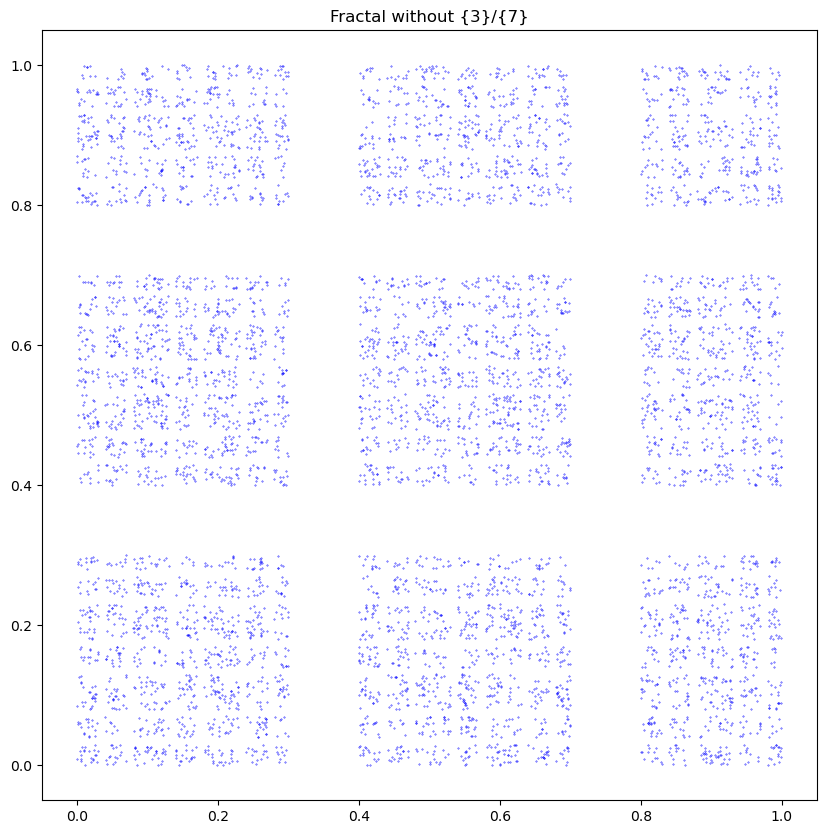

In [3]:
# Параметри
num = 100000
x, y = f_points(num)

# ---------------------------------

plt.figure(figsize=(10, 10))
plt.scatter(x, y, s=0.1, color='blue')
plt.title("Fractal without {3}/{7}")
plt.show()


In [4]:
# ---------------------------------
# Обчислення фрактальної розмірності методом коробок

def box_counting_dimension(x, y, epsilons):
    N_eps = []
    for epsilon in epsilons:
        bins = [np.arange(0, 1 + epsilon, epsilon), np.arange(0, 1 + epsilon, epsilon)]
        H, edges = np.histogramdd(np.column_stack((x, y)), bins=bins)
        N_eps.append(np.sum(H > 0))

    log_eps = np.log(1 / np.array(epsilons))
    log_N = np.log(N_eps)

    # Знаходимо нахил лінії (фрактальна розмірність)
    coeffs = np.polyfit(log_eps, log_N, 1)
    return coeffs[0]

# Вибираємо значення epsilon
epsilons = np.logspace(-4, -1, 10)

# Обчислюємо фрактальну розмірність
print(f"Фрактальна розмірність: {box_counting_dimension(x, y, epsilons)}")

Фрактальна розмірність: 0.565214612052014
